# Task 2

In this task, you will be learning about how Computers represent images. How to read and display images in Python. And how you can apply filters to these images e.g. blurring the image, sharpening, edge detection etc.

## Computer Representation of an image

Think of an image as a 2D grid, where each cell (also known as a pixel) contains a specific colour value. The resolution of an image refers to the number of pixels it contains. Higher resolution means more pixels, which generally translates to a clearer and sharper image. Resolution is often expressed as width x height (e.g., 1920x1080 pixels for Full HD).  

<img src="1.png" alt="pixel-representation-of-an-image" width="200"/>

For colored images, each pixel's color is typically represented using a combination of red, green, and blue (RGB) values. Why exactly RGB? The main reason is because of how display hardware (e.g. monitors) and sensor technology (ones used in cameras) instrinsically work. The displays and camera are built to represent and capture RGB values respectively. Having the same computer representation helps avoid any kind of conversion overhead.

<img src="2.gif" alt="RGB representation of coloured images" width=600>

Another form pixel-value representation which is used is grayscale-representation, typically used in medical imaging e.g. X-rays, MRI, CT-scan and object recognition. Each pixel in grayscale-images contains a single value rather than a size 3 tuple as in the case of RGB images.

<img src="3.png" alt="Grayscale representation of coloured images">

## Importing images in Python

Images in Python are generally read using an external library e.g. Pillow or OpenCV. We will be using OpenCV, since this will be helpful in your Project. Incase you're interested in learning OpenCV in detail (you may refer to this [video](https://www.youtube.com/watch?v=oXlwWbU8l2o)). You won't really need much of OpenCV knowledge except reading and displaying images.

In [ ]:
# Commands startig with ! in Jupyter-notebook are shell commands (same as ones you type in your terminal)

!ls

In [ ]:
!pip install matplotlib
!pip install opencv-python

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Note: No external libraries barring the ones imported above are allowed.

def display_image(img, title=None):
    """
    Function to display an image using matplotlib. Title is specifiable as an optional argument
    """
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    if title:
        plt.title(title)
    plt.show()

In [ ]:
# Images in OpenCV are read using imread() function. The function takes the image names as the input.
img = cv.imread('1.png')

# For displaying images in OpenCV, it is recommended you use the defined function 'display_image()' 
# Generally cv.imshow() function is used for displaying images. But it won't work in Jupyter notebook.
display_image(img, title='Imported image')

In [ ]:
print(img)

In [ ]:
img.shape

As you can see images in OpenCV are essentially multi-dimension lists. $709$ represent the height of the image in terms of no. of pixels (essentially no. of rows for the list), $642$ is the image width (essentially no. of columns for the list) and $3$ denotes that each cell contains 3 values namely RGB. 

In [ ]:
# To print the (200, 200)^th pixel's value
print("Pixel's value", img[200, 200])

In [ ]:
# To print the pixel value of all the pixels in the range (200, m) where 0<=m<200
print("\nPixel value of all the pixels in the range (200, m)", img[200, 0:200])

Leaving the starting limit unspecified e.g., img[200, : 100] is equivalent to img[200, 0:100]. Similarly, not specifying the last element 

In [ ]:
# Printing all the pixel value for first column in the range (m, 0) where 0<=m<150
print(img[:150,0])

## a) Reading and displaying images

Write python code to read an image of your choice and display only the left half of the image.


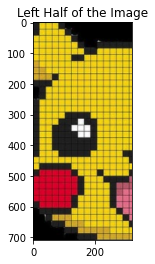

In [1]:
# Write your code here
import cv2 as cv
import matplotlib.pyplot as plt

def display_left(img, title=None):
    width = img.shape[1]

    left_half = img[:, :width // 2, :]
    plt.imshow(cv.cvtColor(left_half, cv.COLOR_BGR2RGB))
    
    if title:
        plt.title(title)
    plt.show()

img = cv.imread('1.png')

display_left(img, title='Left Half of the Image')


## b) Flipping the image

Write a Python function to flip an image horizontally and vertically.

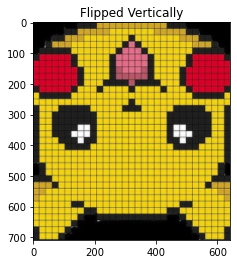

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

def flip_image(img, vertical=False, horizontal=False):
    height, width, col = img.shape
    if (vertical):
        for y in range(height // 2):
            for x in range(width):
                img[y, x], img[height - y - 1, x] = img[height - y - 1, x].copy(), img[y, x].copy()
        
    if (horizontal):
        for y in range(height):
            for x in range(width // 2):
                img[y, x], img[y, width - x - 1] = img[y, width - x - 1].copy(), img[y, x].copy()

    return img

img = cv.imread('1.png')

flipped_vertical = flip_image(img.copy(), vertical=True)
plt.imshow(cv.cvtColor(flipped_vertical, cv.COLOR_BGR2RGB))
plt.title("Flipped Vertically")
plt.show()


Now that you're a little familiar with the digital-representation of an image and some image-handling in Python, you will be tasked with manipulating these images. 

As a Note: Images in OpenCV are essentially numpy arrays and therefore support all numpy operations. This might come in handy later.

# Convolutions

A common operation used in Image Processing is the convolution operation (kind of like a fancy multiplication). You may refer to this [link](https://betterexplained.com/articles/intuitive-convolution/) for an intuitive introduction to the convolution operation.

Imagine you have a quadratic polynomial $ax^2 + bx + c$ represented as using the coefficient list C = [c, b, a], where C[i] = coeff of $x^i$. If we multiply this quadratic polynomial by another quadratic polynomial $dx^2 + ex + f$, then we obtain:

$$
h(x) = (f_2x^2 + f_1x + f_0)(g_2x^2 + g_1x + g_0) = (f_2g_2)x^4 + (f_2g_1 + f_1g_2)x^3 + (f_0g_2 + f_2g_0)x^2 + (f_1g_0 + f_0g_1)x + f_0g_0
$$

Now consider, $$h(x) = \sum_{k=0}^{4} h_k x^k$$
$$h_k = \sum_{i=0}^{k} f_i g_{k-i}$$ 


Just try plugging in some values to verify the same. Now consider the case of $h_2$.
$$h_2 = f[2] \ast g[2] = [f_0 f_1 f_2] \ast [g_0 g_1 g_2]$$

This turns out to be same as flipping the second list $g[2]$ and doing an element-wise multiplication and summing all the element of the obtained list. Here $\ast$ stands for the convolution operation.

Now, one question that might arise in your mind is why to give name to such an operation. The reason is first it occurs frequently in Image Processing and CNNs and second Fast Fourier Tranform which reduces the time complexity of the convolution operation from $\mathcal{O}(n^2)$ to $\mathcal{O}(n\log{}n)$.

## c) Convolution operation

Write a Python function which multiplies two polynomials (given as coefficient lists) using convolution operation defined above.

In [3]:
def multiply_polynomials(poly1, poly2):
    poly1 = poly1[::-1]
    poly2 = poly2[::-1]

    # Degree of the resulting polynomial
    result_degree = len(poly1) + len(poly2) - 1

    result_coefficients = [0] * (result_degree)

    for k in range(result_degree):
        for i in range(max(0, k - len(poly2) + 1), min(len(poly1), k + 1)):
            result_coefficients[k] += poly1[i] * poly2[k - i]

    result_coefficients = result_coefficients[::-1]

    return result_coefficients

poly1 = [1, 1]  # ax^2 + bx + c
poly2 = [1, 1]  # dx^2 + ex + f

result = multiply_polynomials(poly1, poly2)
print("Resulting Polynomial Coefficients:", result)


Resulting Polynomial Coefficients: [1, 2, 1]


# Image Convolution



## d) 2D Convolution

Write a python function which implements the convolution operation on an image given the kernel. Please refer to this [video](https://www.youtube.com/watch?v=8rrHTtUzyZA) by Grant Sanderson to learn about 2D convolutions and how it is connected to the context of blurring images.

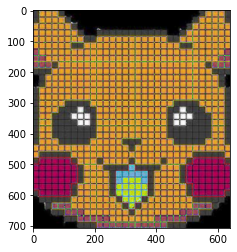

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def display_image(img, title=None):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    if title:
        plt.title(title)
    plt.show()

def convolution_2D(img, kernel):
    image_h, image_w, image_col = img.shape
    kernel_h, kernel_w = kernel.shape

    # The subtraction of kernel_height−1 and kernel_width−1 compensates for the reduction in the number of positions where the full kernel can be applied.
    output_h = image_h - kernel_h + 1
    output_w = image_w - kernel_w + 1
    
    output = np.zeros((output_h, output_w, image_col), dtype=np.uint8)

    # 2D Convolution
    for y in range(output_h):
        for x in range(output_w):
            for c in range(image_col):
                # Apply the kernel at the current position.
                output[y, x, c] = np.sum(img[y : y + kernel_h, x : x + kernel_w, c] * kernel)


    return output

img = cv.imread('1.png')
kernel = np.array([[0.5, 0.5, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

convolved_img = convolution_2D(img, kernel)

display_image(convolved_img)

## e) Blurring Images

Write a python function which blur an image using the Gaussian Blur kernel.

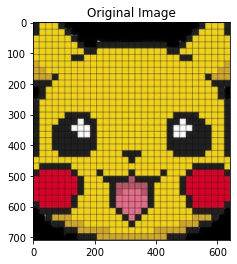

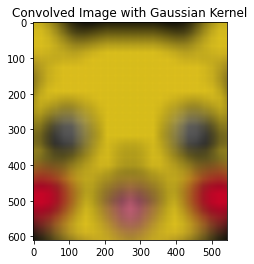

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def display_image(img, title=None):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    if title:
        plt.title(title)
    plt.show()

def gaussian_distribution(x, y, sigma):
    return (1 / (2 * np.pi * sigma**2)) * np.exp(-((x**2 + y**2) / (2 * sigma**2)))

def gaussian_kernel(kernel_size, sigma):
    kernel = np.zeros((kernel_size, kernel_size))
    center = (kernel_size - 1) / 2

    for i in range(kernel_size):
        for j in range(kernel_size):
            kernel[i, j] = gaussian_distribution(i - center, j - center, sigma)

    kernel /= np.sum(kernel)
    return kernel

img = cv.imread('1.png')

kernel_size = 100
sigma = 60

gaussian_kernel = gaussian_kernel(kernel_size, sigma)

gaussian_kernel /= np.sum(gaussian_kernel)

convolved_img = convolution_2D(img, gaussian_kernel)

display_image(img, title='Original Image')
display_image(convolved_img, title='Convolved Image with Gaussian Kernel')


## f) Sharpening images

Write a python function which sharpens an image. Try to find the associated kernel for sharpening images.

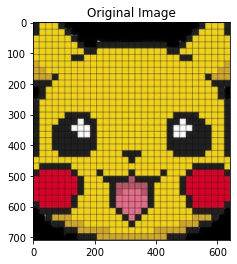

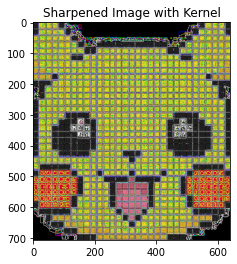

In [6]:
import numpy as np
import cv2
import numpy as np

img = cv.imread('1.png')

def sharping(image, kernel_size=(3, 3)):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
    kernel = np.zeros((3, 3), np.float32)
    kernel[0, 1] = -1.0
    kernel[1, 0] = -1.0
    kernel[1, 2] = -1.0
    kernel[2, 1] = -1.0
    kernel[1, 1] = 5.0
    
    kernel /= np.sum(kernel)
    sharp = cv2.filter2D(gray, -1, kernel)
    
    return sharp

def kernelSharp(size):
    kernel = np.full((size, size), -1)
    kernel[size//2][size//2] = size*size

    return kernel

def sharpen_image(img, kernel_size):
    kernel = kernelSharp(kernel_size)
    image = convolution_2D(img, kernel)
    return image

sharp_img = sharpen_image(img, 3)

display_image(img, title='Original Image')
display_image(sharp_img, title='Sharpened Image with Kernel')

## Bonus: Edge detection

Write a Python function to do Edge detection. For the theory part regarding how edge detection works, you may refer to the first 5 videos of this [playlist](https://www.youtube.com/playlist?list=PL2zRqk16wsdqXEMpHrc4Qnb5rA1Cylrhx).